In [0]:
import networkx as nx;
import numpy as np;
import matplotlib;
import matplotlib.pyplot as plt;
import math;

In [0]:
def Calc_chi_and_S(network):
    _network_N = network.number_of_nodes();
    _comps = nx.connected_components(network);
    _comp_sizes = [len(_comp) for _comp in _comps];
    _sort_c_sizes = sorted(_comp_sizes,reverse=True);
    _lcs = _sort_c_sizes[0]/_network_N;
    _chi = 0;
    if len(_sort_c_sizes) > 1:
        _chi = sum([_sort_c_sizes[i]*_sort_c_sizes[i] for i in range(1,len(_sort_c_sizes))]);
        return _chi/(len(_sort_c_sizes)),_lcs;
    else:
        return _chi,_lcs;

In [0]:
N, num_samp = 2000, 10;
delta = 800;
p_crit = 1/(N-1);
maxChi = 0;
est_N_crit = 0;
size_list = np.linspace(N-delta, N+delta, num = 100, endpoint = False, dtype = 'int')
av_S,av_chi = [],[];
av_S.clear();
av_chi.clear();
for size in size_list:
    S_values, chi_values = [],[];
    S_values.clear();
    chi_values.clear();
    for i in range(0,num_samp):
        ER_graph = nx.generators.erdos_renyi_graph(size,p_crit);
        chi,S = Calc_chi_and_S(ER_graph);
        S_values.append(S);
        chi_values.append(chi);
    av_S.append(np.mean(S_values));
    meanChi = np.mean(chi_values)
    if (meanChi > maxChi):
        maxChi = meanChi;
        est_N_crit = size;
    av_chi.append(meanChi);

<Figure size 432x288 with 0 Axes>

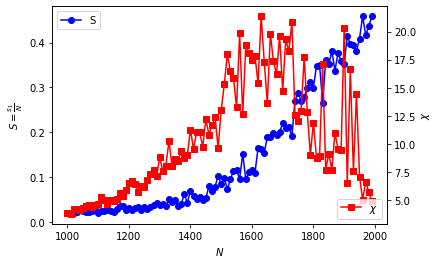

In [18]:
plt.clf();
fig,ax = plt.subplots()
ax.plot(size_list,av_S,'o-',label = 'S', color = 'blue')
ax.set_ylabel(r'$S=\frac{s_1}{N}$')
ax2=ax.twinx()
ax2.plot(size_list,av_chi,'s-',label = r'$\chi$',color = 'red')
ax2.set_ylabel(r'$\chi$')
ax.set_xlabel(r'$N$')
ax.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')
plt.show();

In [0]:
from google.colab import files
import json

data = {}
data['N'] = N;
data['est_N_crit'] = int(est_N_crit);
data['maxChi'] = maxChi;
data['size_list'] = size_list.tolist();
data['av_S'] = av_S;
data['av_chi'] = av_chi;

with open('s_chi_e-r_2000_scale_n.json', 'w') as json_file:
  json.dump(data, json_file)

files.download('s_chi_e-r_2000_scale_n.json')